In [1]:
# import required packages
import pandas as pd
from collections import defaultdict
from tqdm import tqdm
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [2]:
# config
ds_name = 'Bookcrossing'
ds_acronym = 'BX'
ds_core = '5Rate'
ds_feedback = 'Explicit'

In [3]:
# loading the Book-Crossing dataset
dataset = pd.read_csv(f"dataset/{ds_name}/{ds_acronym}-Book-{ds_feedback}-{ds_core}-Map.csv", sep=",")

In [17]:
user_books = defaultdict(list)
for eachline in tqdm(dataset.iterrows()):
    uid, bid, rating = eachline[1][0], eachline[1][1], eachline[1][2] 
    uid, bid = int(uid), int(bid)
    if uid in user_books.keys():
        user_books[uid].append(bid)
    else:
        user_books[uid] = [bid]

88552it [00:11, 7613.84it/s]


In [21]:
def group_profile_size():
    for group in ["active_users", "medium_users", "inactive_users"]:
        count = 0
        user_group = pd.read_csv(f"dataset/Bookcrossing/user-groups/{group}.txt")
        for eachline in user_group.itertuples(index=True):
            count += len(user_books[eachline.user_id])
        print(f"{group}: {count}")

In [22]:
group_profile_size()

active_users: 12657
medium_users: 61889
inactive_users: 14006


## Correlations
Finsinf the correlation between NDCG and DelatGAP on the user groups.

In [26]:
details = {
    "Model": ["MostPop", "MostPop", "MostPop", "BPR", "BPR", "BPR", "MF", "MF", "MF", "PMF", "PMF", "PMF", "NMF", "NMF", "NMF", "WMF", "WMF", "WMF", "PF", "PF", "PF", "NeuMF", "NeuMF", "NeuMF", "VAECF", "VAECF", "VAECF"],
    "Group": ["N", "D", "B", "N", "D", "B", "N", "D", "B", "N", "B", "D", "N", "B", "D", "N", "D", "B", "N", "D", "B", "N", "D", "B", "N", "D", "B"],
    "NDCG10":[0.0043, 0.0169, 0.0382, 0.0044, 0.0169,0.0382, 0.0013, 0.002, 0.0019, 0.0029, 0.005, 0.0075, 0.0008, 0.0008, 0.0002, 0.0177, 0.0176, 0.0377, 0.0035,0.0141,0.032, 0.0032, 0.0157, 0.0354, 0.0087, 0.0238, 0.0542],
    "DeltaGAP": [1230, 541, 298, 1235, 542, 299, 10, -15, -20, 195, 20, 0, -10, -20, -25, 20, 110, 85, 240, 180, 85, 1100, 520, 222, 410, 250, 195]
    }

In [27]:
details_df = pd.DataFrame.from_dict(details, orient='columns', dtype=None)

In [28]:
details_df.head()

,Model,Group,NDCG10,DeltaGAP
0,MostPop,N,0.0043,1230
1,MostPop,D,0.0169,541
2,MostPop,B,0.0382,298
3,BPR,N,0.0044,1235
4,BPR,D,0.0169,542


In [66]:
def corr_analysis(group='N'):
    fig, ax = plt.subplots()
    fig.set_size_inches(4.1, 3)
    df_data = details_df[details_df.Group == group]
    p5 = sns.regplot(x="NDCG10", y="DeltaGAP", data=df_data)
    r, p = sp.stats.pearsonr(df_data['NDCG10'], df_data['DeltaGAP'])
    print(f"{group} -> r: {r} , p: {p}")
    p5.set_xlabel("NDCG@10", size=14)
    p5.set_ylabel("$\Delta$GAP", size=14)
    plt.savefig(f"plots/corr/{group}.pdf", bbox_inches='tight')

N -> r: -0.1539853490238823 , p: 0.6924361774090534
D -> r: 0.6593866318236823 , p: 0.05335391026052799
B -> r: 0.7941629920449572 , p: 0.010582872621996574


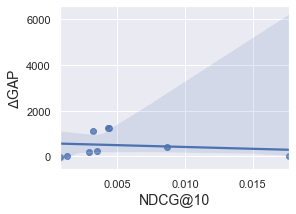

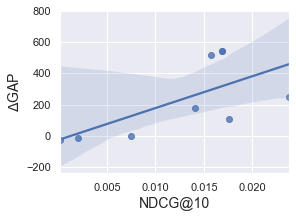

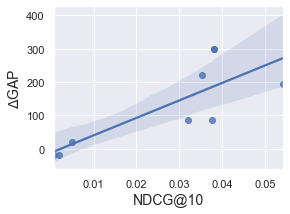

In [67]:
for group in ['N', 'D', 'B']:
    corr_analysis(group=group)